### **TITANIC SURVIVAL PREDICTION**










 Features Description:

    1.PassengerId: A unique identifier assigned to each passenger.
    
    2.Survived: Indicates whether a passenger survived (1) or died (0).

    3.Pclass: Represents the passenger class, which can be a numerical or categorical value indicating the class of travel (e.g., first, second, or third class).

    4.Name: The name of the passenger.

    5.Sex: Represents the gender of the passenger, typically categorized as male or female.

    6.Age: The age of the passenger, often represented as a numerical value.

    7.SibSp: Indicates the number of siblings or spouses traveling with the passenger.

    8.Parch: Represents the number of parents or children traveling with the passenger.

    9.Ticket: The ticket number associated with the passenger's ticket.

    10.Fare: The amount of money spent on the ticket.

    11.Cabin: Represents the cabin category or number assigned to the passenger, if available.

    12.Embarked: Indicates the port where the passenger embarked from, typically represented by a single character code (e.g., C for Cherbourg, Q for Queenstown, S for Southampton).






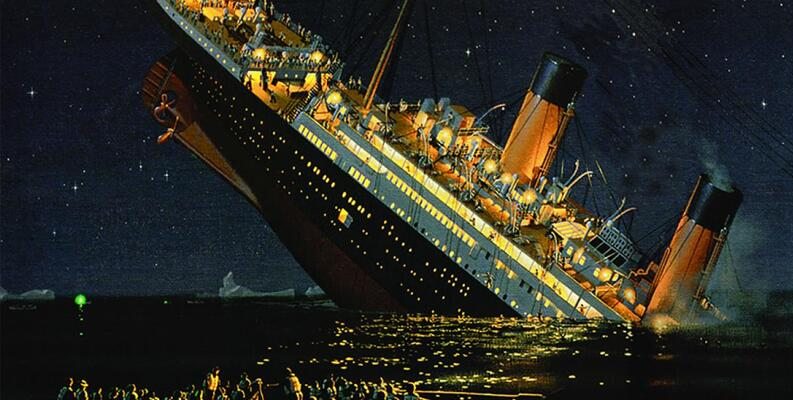

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**Data Preprocessing**

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.shape

(418, 12)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
# Information about all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [9]:
# To check the duplicate values in the dataset
df.duplicated().sum()

0

In [10]:
#To check null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# Lets drop the unwanted columns
df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

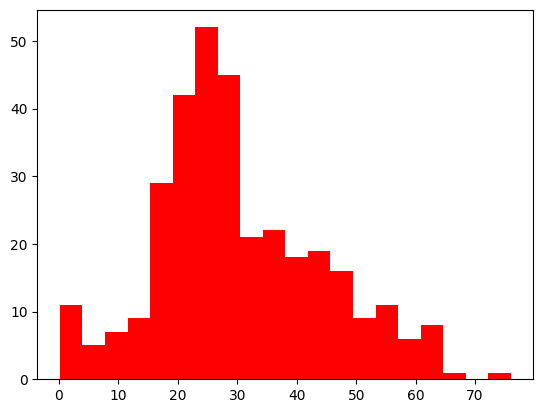

In [12]:
x=df['Age']
plt.hist(x,bins=20,color='red')
plt.show()

In [13]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

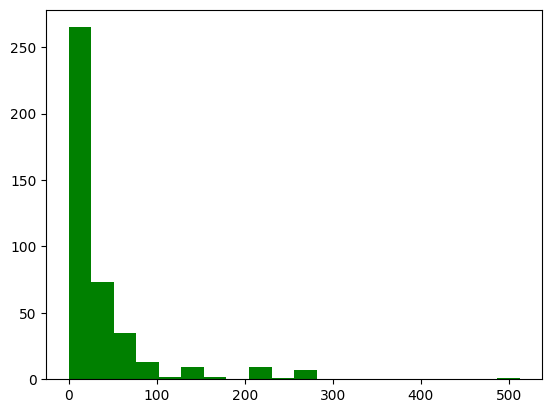

In [14]:
x=df['Fare']
plt.hist(x,bins=20,color='green')
plt.show()

In [15]:
df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)

In [16]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
df["Survived"].value_counts()

0    266
1    152
Name: Survived, dtype: int64

**Data Visualization**

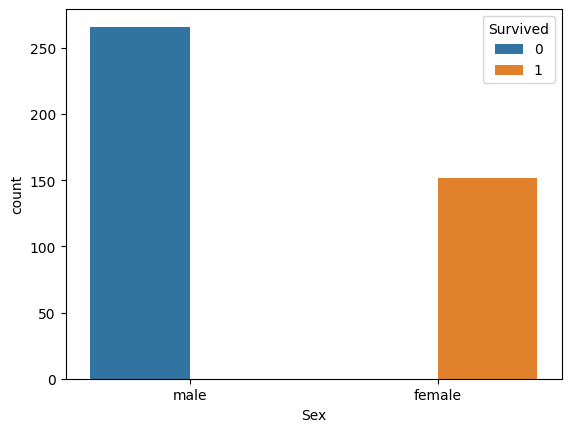

In [18]:
sns.countplot(x='Sex',data = df,hue='Survived')
plt.show()


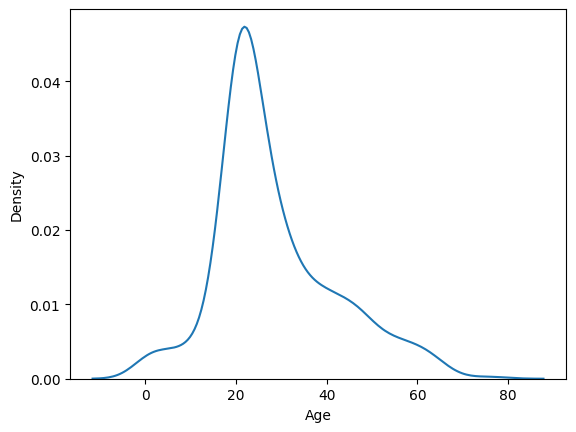

In [19]:
# Age Distribution
sns.kdeplot(x=df['Age'])
plt.show()


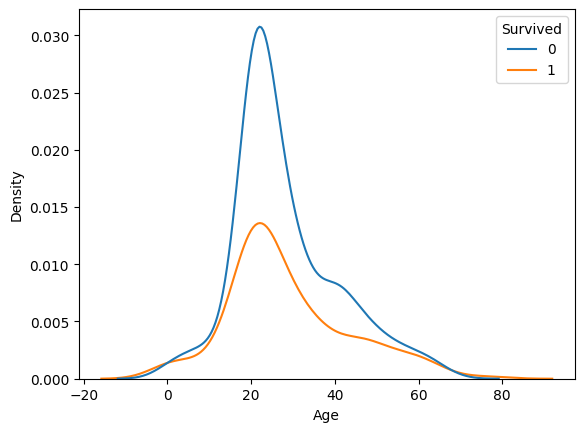

In [20]:
sns.kdeplot(x=df['Age'],hue=df['Survived'])
plt.show()

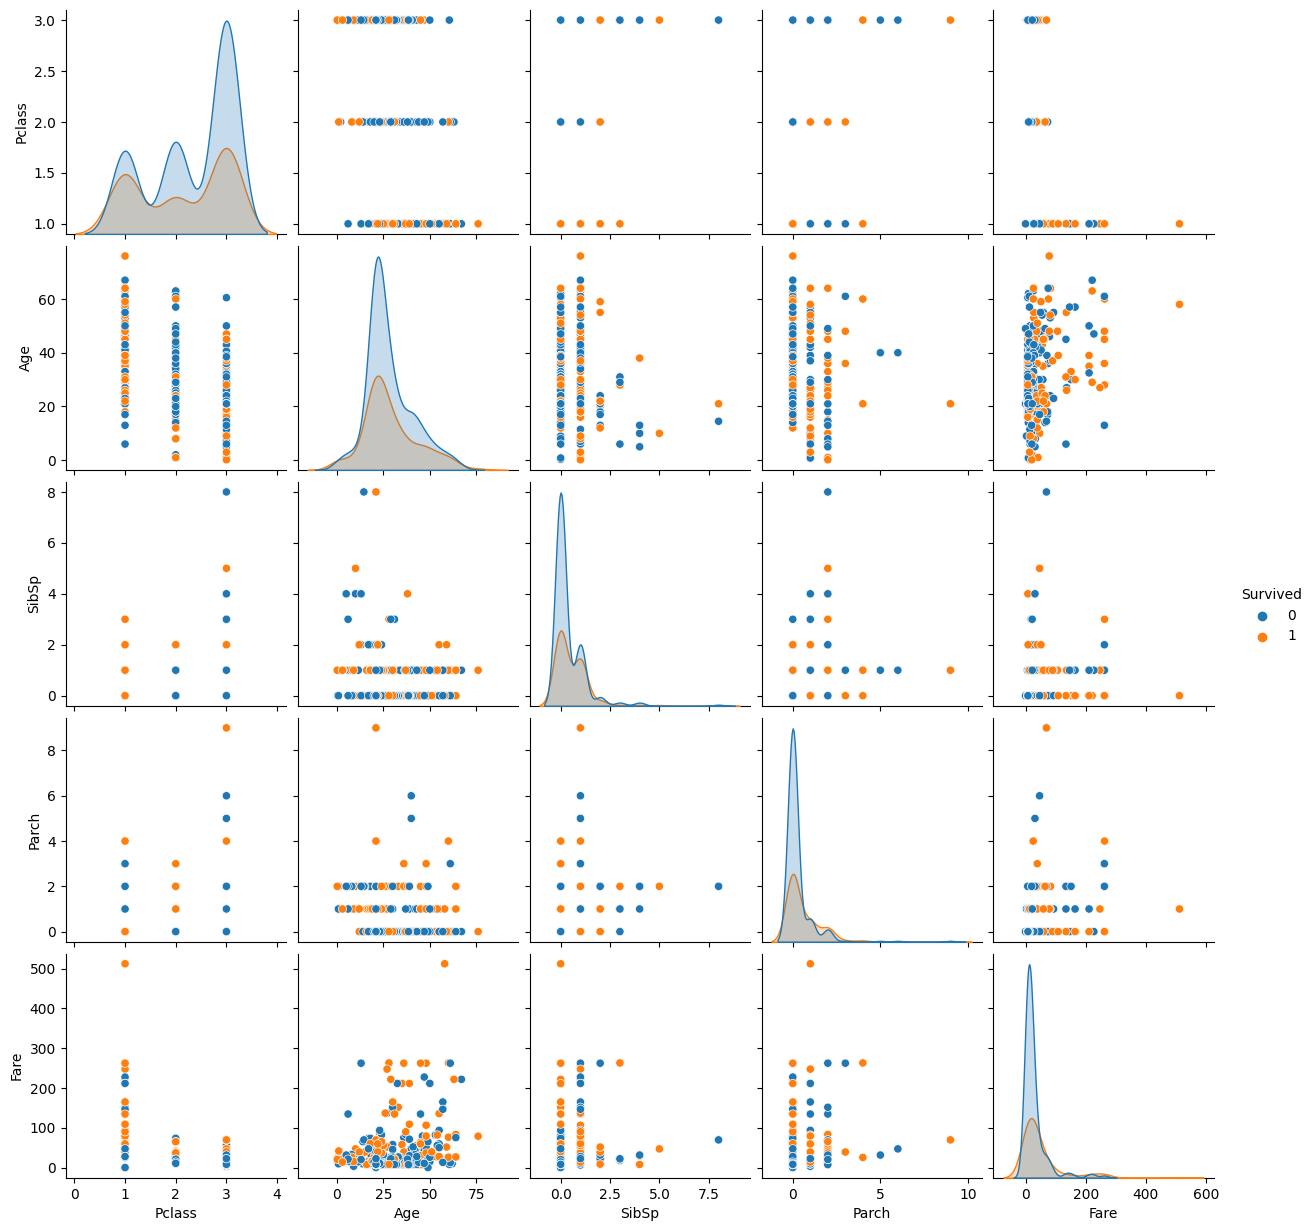

In [21]:
#Understanding the relationship between all the features
sns.pairplot(df, hue='Survived')


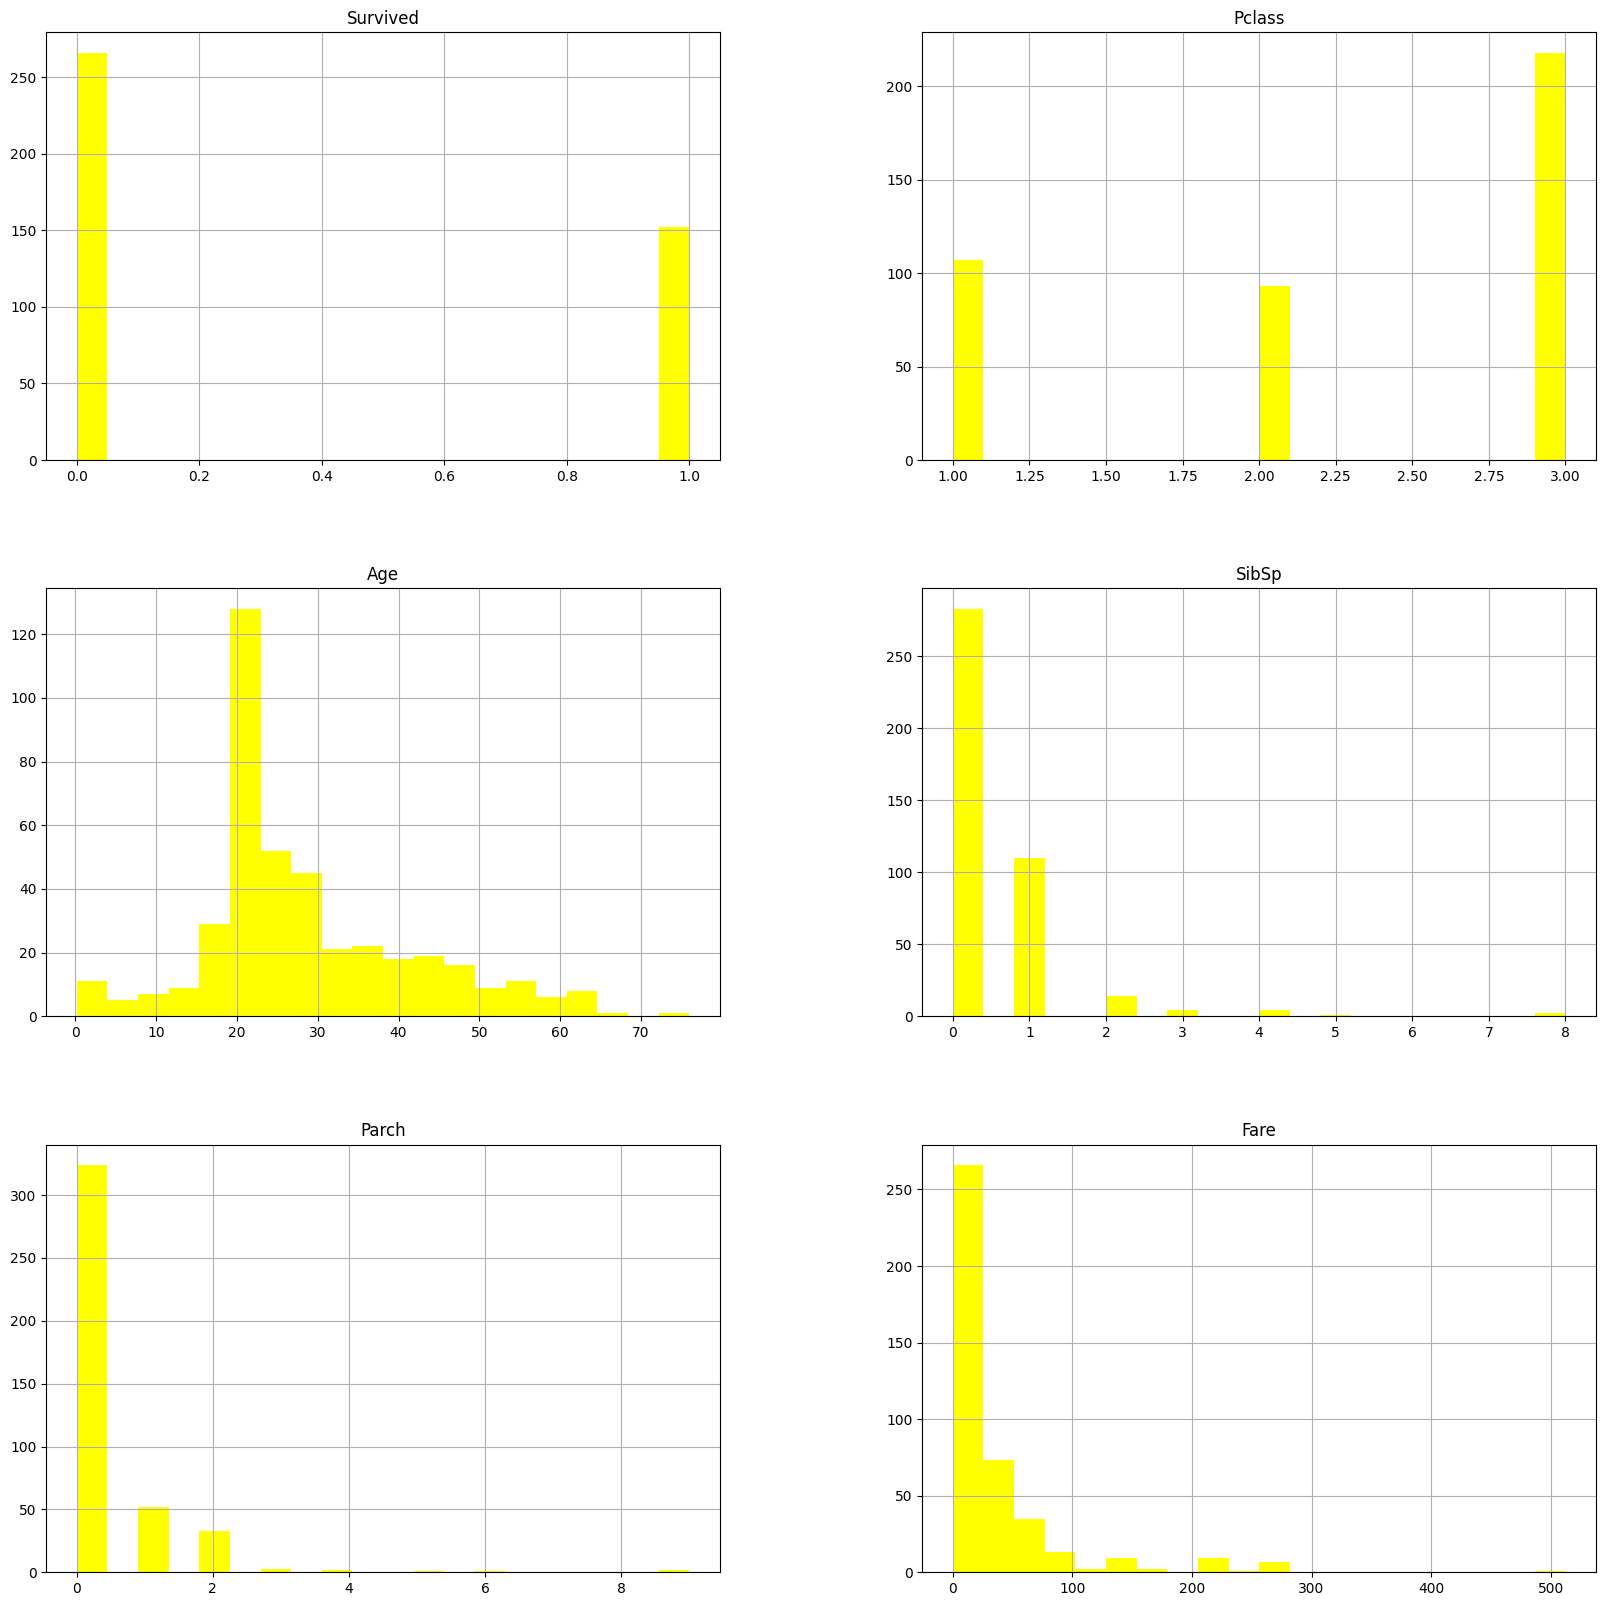

In [22]:
df.hist(bins=20, figsize=(20, 20),color='yellow')
plt.show()

<ipython-input-23-35eb01f89ef8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.5)


<Axes: >

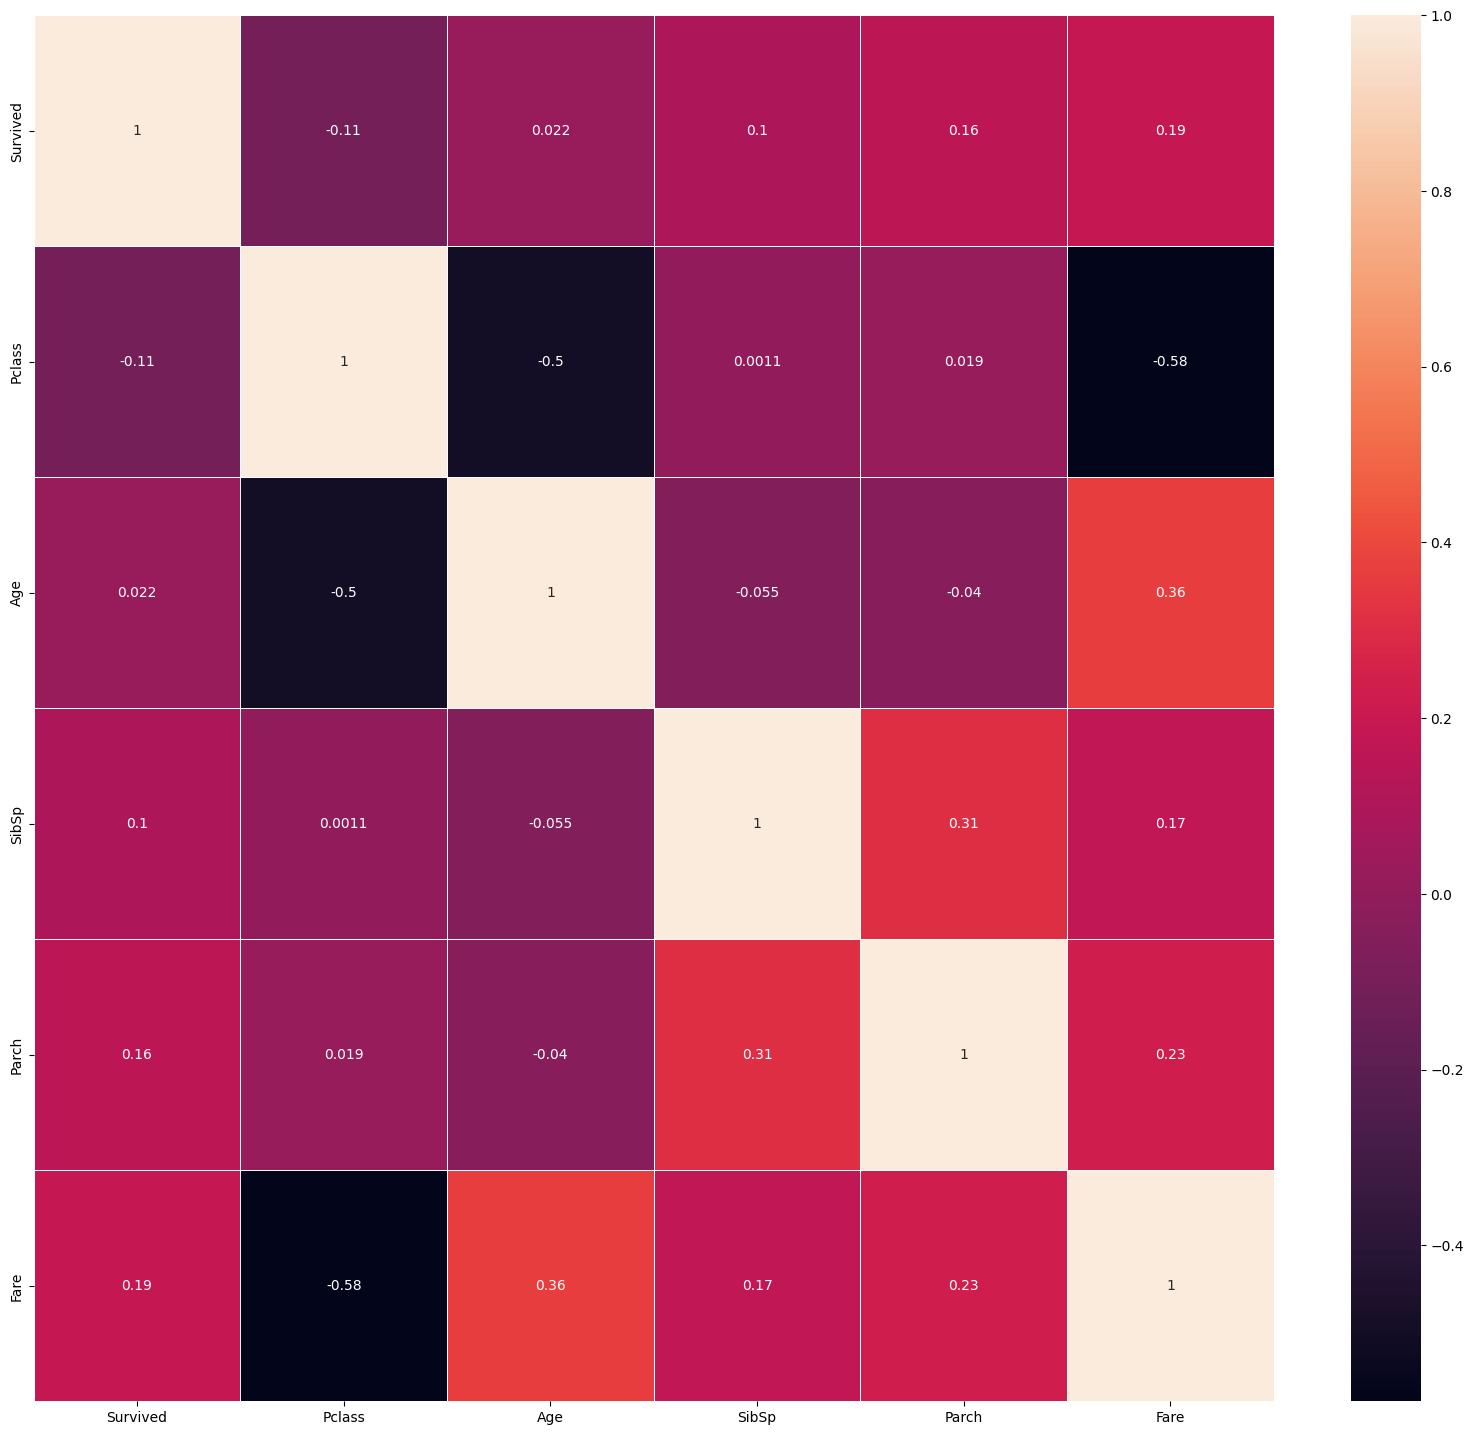

In [23]:
# Let's check the correlation between the variables
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True, linewidths=.5)

In [24]:
#Label encoding-convert categorical features into numerical feature
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]= le.fit_transform(df["Sex"])
df["Embarked"]= le.fit_transform(df["Embarked"])


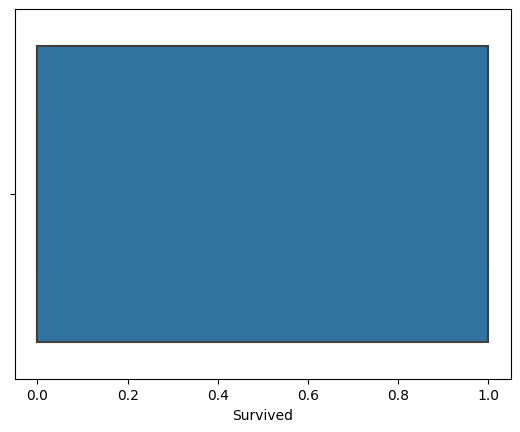

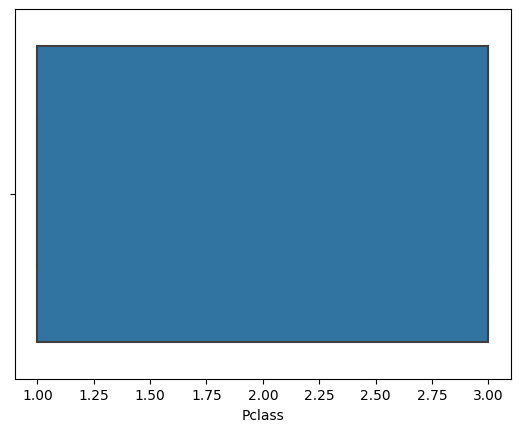

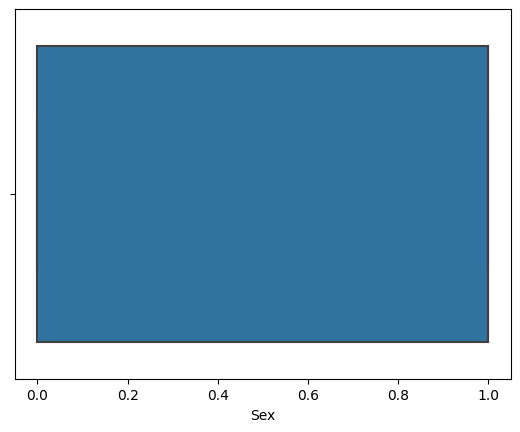

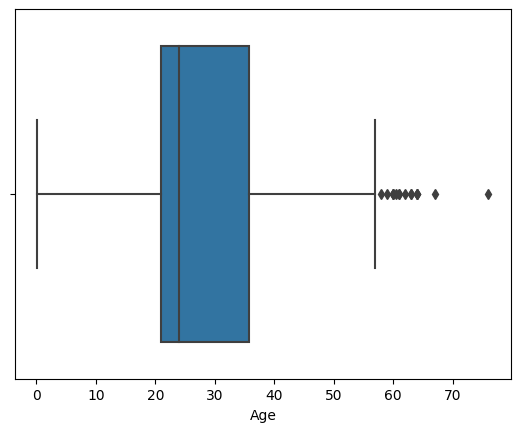

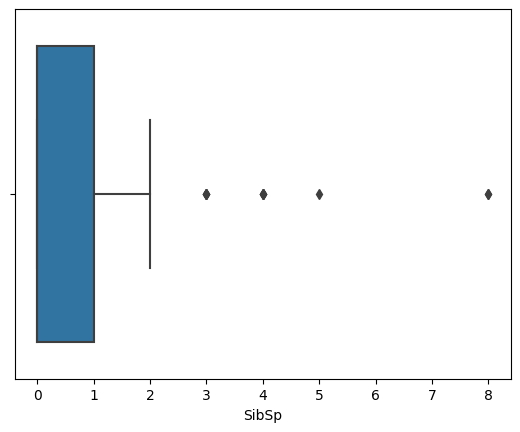

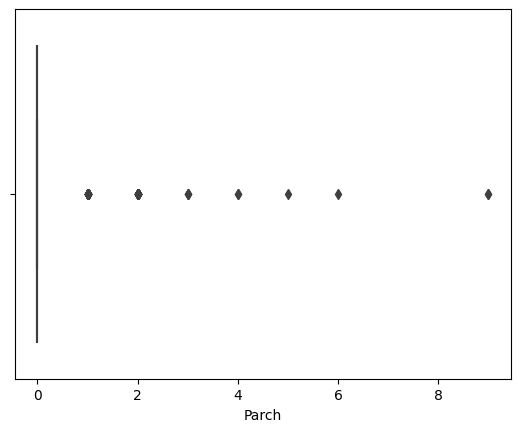

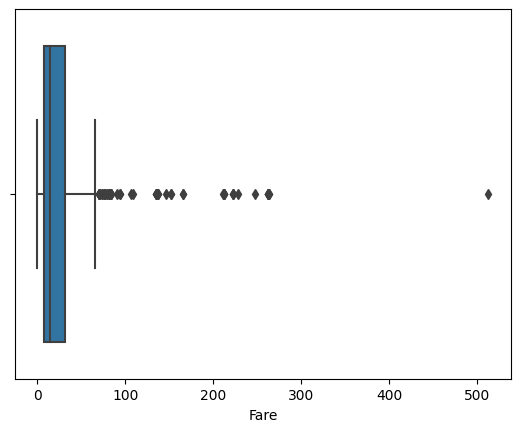

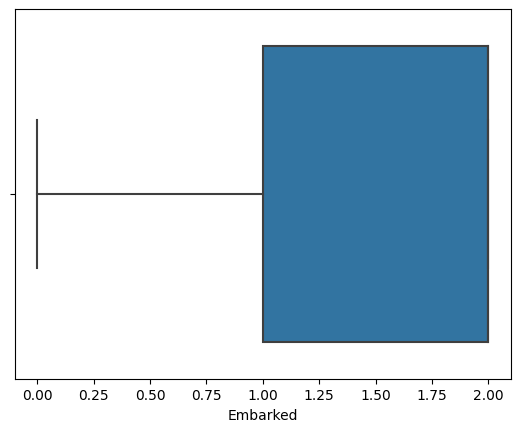

In [25]:
#check the presence of outliers
for i in df:
  sns.boxplot(x=df[i])
  plt.show()

In [26]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [27]:
#Split data into Training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

**Normalization**

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

**Model Creation**

 **Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

[[85  0]
 [ 0 41]]


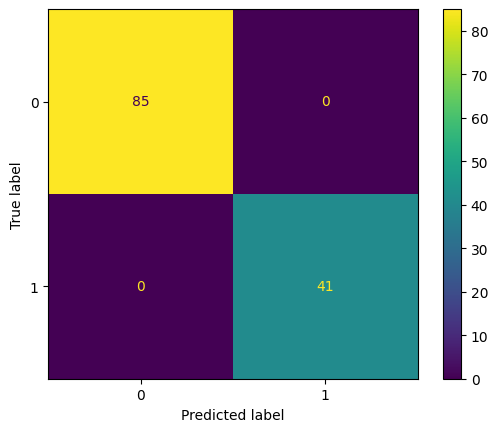

In [30]:
#confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred)
print(result)
labels = ['0','1']
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()


In [31]:
#accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
y_report = classification_report(y_test,y_pred)
y_scores = cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')
print('The classification report of Logistic Regression is below :','\n\n\n',y_report)
print(f'Logistic Regression Mean cross val score:{y_scores}')



The classification report of Logistic Regression is below : 


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Logistic Regression Mean cross val score:[1. 1. 1. 1. 1.]


**Decision Tree & Random Forest**

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(criterion='entropy')
from sklearn.ensemble import RandomForestClassifier
forest_model=RandomForestClassifier(n_estimators=100)
lst=[tree_model,forest_model]


**Performance Evaluation**

DecisionTreeClassifier(criterion='entropy')
**********************************************************************
[[85  0]
 [ 0 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

RandomForestClassifier()
**********************************************************************
[[85  0]
 [ 0 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



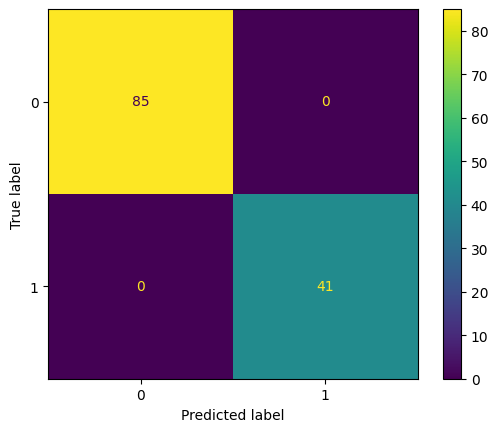

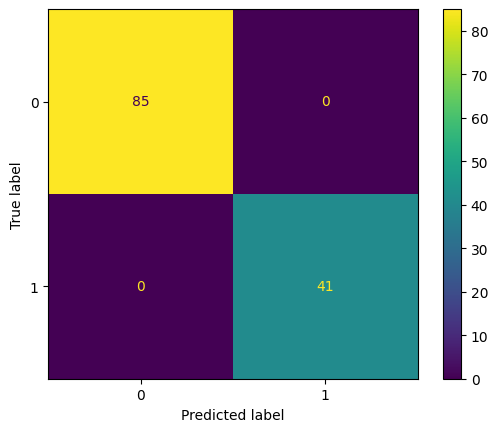

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
for i in lst:
  print(i)
  print('**********************************************************************')
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  labels=[0,1]
  result=confusion_matrix(y_test,y_pred)
  cmd=ConfusionMatrixDisplay(result,display_labels=labels)
  cmd.plot()